In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [3]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
 
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [4]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY) #Reading color images
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
 
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [5]:
img

array([[[168, 166, 166],
        [123, 122, 122],
        [129, 129, 129],
        ...,
        [194, 165, 138],
        [192, 162, 135],
        [190, 160, 133]],

       [[193, 191, 191],
        [153, 152, 152],
        [167, 167, 167],
        ...,
        [196, 167, 140],
        [194, 165, 137],
        [192, 162, 135]],

       [[202, 201, 202],
        [162, 163, 163],
        [180, 181, 182],
        ...,
        [198, 170, 143],
        [197, 167, 141],
        [193, 165, 139]],

       ...,

       [[ 67,  76,  76],
        [ 81,  92,  91],
        [113, 126, 126],
        ...,
        [ 91, 110, 125],
        [ 89, 108, 123],
        [ 89, 108, 123]],

       [[ 69,  80,  78],
        [ 99, 111, 109],
        [113, 126, 125],
        ...,
        [ 84, 103, 118],
        [ 85, 104, 119],
        [ 76,  95, 110]],

       [[ 85,  96,  93],
        [108, 121, 118],
        [ 94, 108, 107],
        ...,
        [ 74,  93, 108],
        [ 79,  98, 113],
        [ 66,  85, 100]]

In [6]:
#Test images
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/validation/*"):
    test_label = directory_path.split("-")[-1]
    print(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

minor
severe
moderate


In [7]:
train_images.shape,train_labels.shape

((1383, 128, 128, 3), (1383,))

In [8]:
test_images.shape,test_labels.shape

((248, 128, 128), (248,))

In [9]:
#Encoding labels
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#Spliting data into train, validation and test datasets 
x_train, x_val,y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.3, random_state=1)
x_test, y_test = test_images, test_labels_encoded

In [11]:
# Normalizing pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((414, 128, 128), (414,), (969, 128, 128), (969,), (248, 128, 128), (248,))

In [ ]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #Iterating through each file 
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        
        input_img = x_train[image, :,:]
        img = input_img

         # FEATURE 1 - Pixel values         
        #Adding pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values  
        
        # # FEATURE 2 - Gabor filter responses
        #         #Generating Gabor features
        # num = 1 
        # kernels = []
        # for theta in range(2):   #Defining number of thetas
        #     theta = theta / 4. * np.pi
        #     for sigma in (1, 3):  #Sigma with 1 and 3
        #         lamda = np.pi/4
        #         gamma = 0.5
                
        #         gabor_label = 'Gabor' + str(num)  #Labelling Gabor columns as Gabor1, Gabor2, etc.
        #         ksize=9
        #         kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
        #         kernels.append(kernel)

        #         fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        #         filtered_img = fimg.reshape(-1)
        #         df[gabor_label] = filtered_img  #Labeling columns as Gabor1, Gabor2, etc.
        #         num += 1  #Iterate all over
                
         
        # # FEATURE 3 Sobel
        # edge_sobel = sobel(img)
        # edge_sobel1 = edge_sobel.reshape(-1)
        # df['Sobel'] = edge_sobel1
       
        # #Adding filters as needed
        # #ROBERTS EDGE
        # edge_roberts = roberts(img)
        # edge_roberts1 = edge_roberts.reshape(-1)
        # df['Roberts'] = edge_roberts1
        # #SCHARR
        # edge_scharr = scharr(img)
        # edge_scharr1 = edge_scharr.reshape(-1)
        # df['Scharr'] = edge_scharr1

        # #PREWITT
        # edge_prewitt = prewitt(img)
        # edge_prewitt1 = edge_prewitt.reshape(-1)
        # df['Prewitt'] = edge_prewitt1

        #GAUSSIAN with sigma=3
        from scipy import ndimage as nd
        gaussian_img = nd.gaussian_filter(img, sigma=3)
        gaussian_img1 = gaussian_img.reshape(-1)
        df['Gaussian s3'] = gaussian_img1

        #GAUSSIAN with sigma=7
        gaussian_img2 = nd.gaussian_filter(img, sigma=7)
        gaussian_img3 = gaussian_img2.reshape(-1)
        df['Gaussian s7'] = gaussian_img3

        #MEDIAN with sigma=3
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)
        df['Median s3'] = median_img1

        #VARIANCE with size=3
        variance_img = nd.generic_filter(img, np.var, size=3)
        variance_img1 = variance_img.reshape(-1)
        df['Variance s3'] = variance_img1  #Add column to original dataframe
        
        #Append features from current image to the dataset
        # image_dataset = image_dataset.append(df)
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

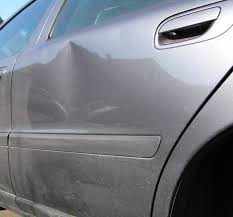

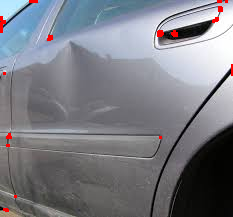

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow



img = cv.imread('/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG')

cv2_imshow(img)
# cv2_imshow(gray)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

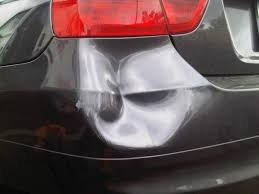

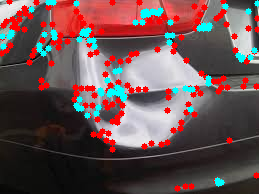

In [ ]:

import numpy as np
import cv2 as cv

img = cv.imread('/content/drive/MyDrive/data3a/training/01-minor/0005.JPEG')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# SHI-TOMASI METHOD
corners = cv2.goodFeaturesToTrack(gray, maxCorners=200,
                qualityLevel=0.01, minDistance=5)
corners = np.int0(corners)

for c in corners:
    x, y = c.ravel()
    img = cv2.circle(img, center=(x, y), radius=3, 
                    color=(0, 0, 255), thickness=-5)

# HARRIS CORNER DETECTION
corners = cv2.goodFeaturesToTrack(gray, maxCorners=200,
                qualityLevel=0.01, minDistance=1,
                useHarrisDetector=True, k=0.1)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, [255, 255, 0], -1)

cv2_imshow(img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

In [ ]:
#Extracting features
image_features = feature_extractor(x_train)

In [ ]:
image_features.shape

(9060352, 9)

In [ ]:
# df_image_features = pd.DataFrame(image_features)
# df_image_features.to_csv('fearued_dataset.csv')

In [ ]:
# df_1=pd.read_csv('/content/drive/MyDrive/fearued_dataset.csv', index_col=0)

In [ ]:
# image_features=df_1.to_numpy()

In [ ]:
#Reshaping to a vector for ML training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features


In [ ]:
X_for_RF.shape

(553, 147456)

In [ ]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

#Can also use SVM but RF is faster and may be more accurate.
# from sklearn import svm
# SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification


# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding
# SVM_model.fit(X_for_RF, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
X_for_RF.shape,y_train.shape

((1106, 212992), (1106,))

In [ ]:
#Predict on test
test_prediction_RF = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction_RF = le.inverse_transform(test_prediction_RF)

In [ ]:
#Predict on test
test_prediction_SVM = SVM_model.predict(test_for_SVM)
#Inverse le transform to get original label back. 
test_prediction_SVM = le.inverse_transform(test_prediction_SVM)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_RF))
# print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_SVM))

Accuracy =  0.4879032258064516


<Axes: >

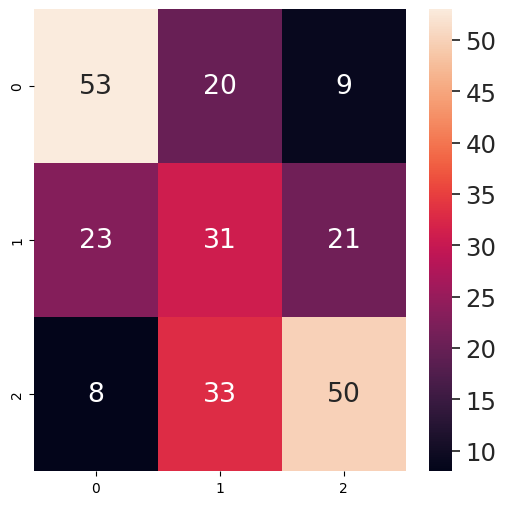

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction_RF)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

<Axes: >

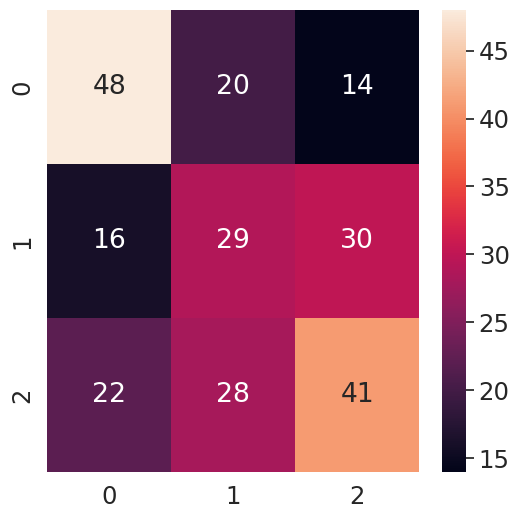

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction_SVM)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The prediction for this image is:  ['severe']
The actual label for this image is:  severe


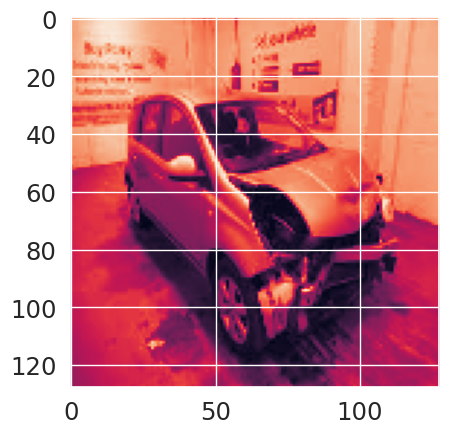

In [ ]:
#Checking results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Selecting the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extracting features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predicting
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reversing the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
X_for_RF.shape

(1106, 212992)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# pca = PCA(n_components=.9, svd_solver='full')
# pca.fit(X_for_RF)

In [ ]:
pca = PCA(0.90)
X_for_RF_pca = pca.fit_transform(X_for_RF)
X_for_RF_pca.shape

(1106, 246)

In [ ]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

RF_model.fit(X_for_RF_pca, y_train) #For sklearn no one hot encoding
x_predict_pca=RF_model.predict(X_for_RF_pca)
metrics.accuracy_score(x_predict_pca, y_train)


1.0

In [ ]:
X_for_RF_pca.shape,y_train.shape,test_for_RF.shape

((1106, 246), (1106,), (248, 212992))

In [ ]:
# #Predict on Test data
# #Extract features from test data and reshape, just like training data
# test_features = feature_extractor(x_test)
# test_features = np.expand_dims(test_features, axis=0)
# test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))


In [ ]:
# x_predict_pca=RF_model.predict(test_for_RF)
# metrics.accuracy_score(x_predict_pca, y_train)

In [ ]:
# #Predict on test
# test_prediction_RF = RF_model.predict(test_for_RF)
# #Inverse le transform to get original label back. 
# test_prediction_RF = le.inverse_transform(test_prediction_RF)
# print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_RF))